# XGBoost Classifying

*   Jacob Yousif


## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install matplotlib seaborn

In [3]:
%%capture


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize

## Loading the data

In [4]:
data = np.load('Datasets/LearningSet.npz')
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [5]:
plots_dir = 'Plots/XGBoost/'

## XGBoost

In [6]:
best_xgb = joblib.load('Model/TrainedXGBoostModel.joblib')

In [7]:
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [8]:
performance_metrics = {'Accuracy': [accuracy], 'F1': [f1], 'Precision': [precision], 'Recall': [recall]}

In [9]:
metrics = pd.DataFrame(performance_metrics)

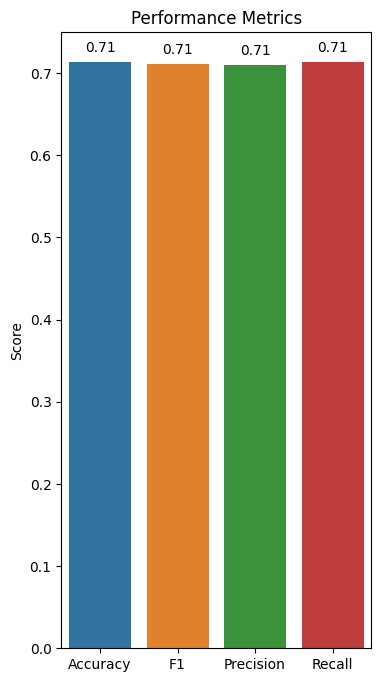

In [10]:
plt.figure(figsize=(4, 8))
ax = sns.barplot(data=metrics)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha = 'center',  
                va = 'center',  
                xytext = (0, 10),  
                textcoords = 'offset points')
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.savefig(f'{plots_dir}PerformanceMetrics.pdf', bbox_inches='tight')
plt.show()

In [11]:
authors = {
  0: "Agatha Christie",
  1: "Andre Norton",
  2: "Charles Dickens",
  3: "Edith Wharton",
  4: "Elizabeth Gaskell",
  5: "Ellen Glasgow",
  6: "George Eliot",
  7: "Isaac Asimov",
  8: "Jack London",
  9: "Jane Austen",
  10: "Joseph Conrad",
  11: "L. M. Montgomery",
  12: "Louisa May Alcott",
  13: "Mark Twain",
  14: "May Sinclair",
  15: "Ray Bradbury",
  16: "Susan Coolidge",
  17: "Victor Hugo"
}

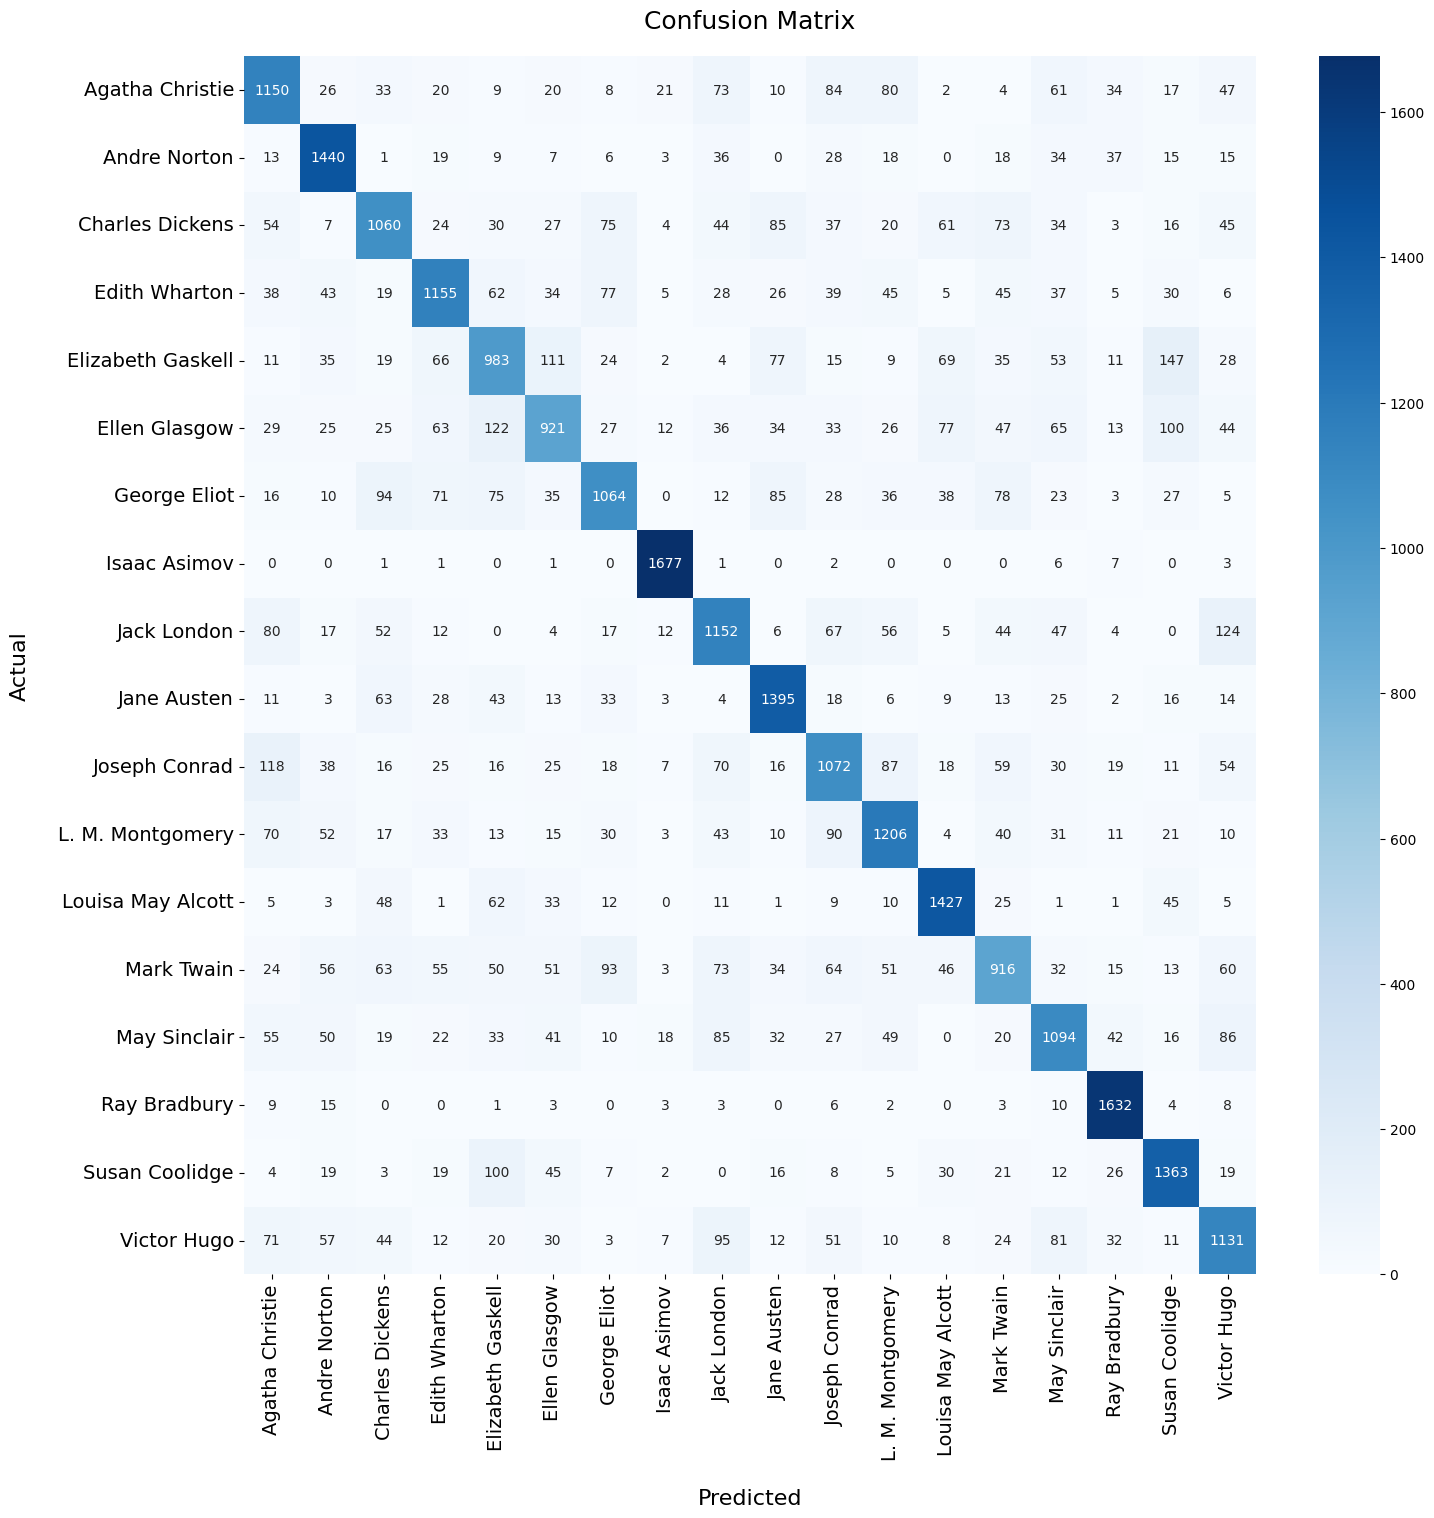

In [12]:
cm = confusion_matrix(y_test, y_pred)
author_names = [authors.get(i, f'Label: {i}') for i in range(len(authors))]

plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=author_names, yticklabels=author_names)

plt.xlabel('Predicted', labelpad=20, fontsize=16)
plt.ylabel('Actual', labelpad=20, fontsize=16)
plt.title('Confusion Matrix', pad=20, fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig(f'{plots_dir}ConfusionMatrix.pdf', bbox_inches='tight')
plt.show()

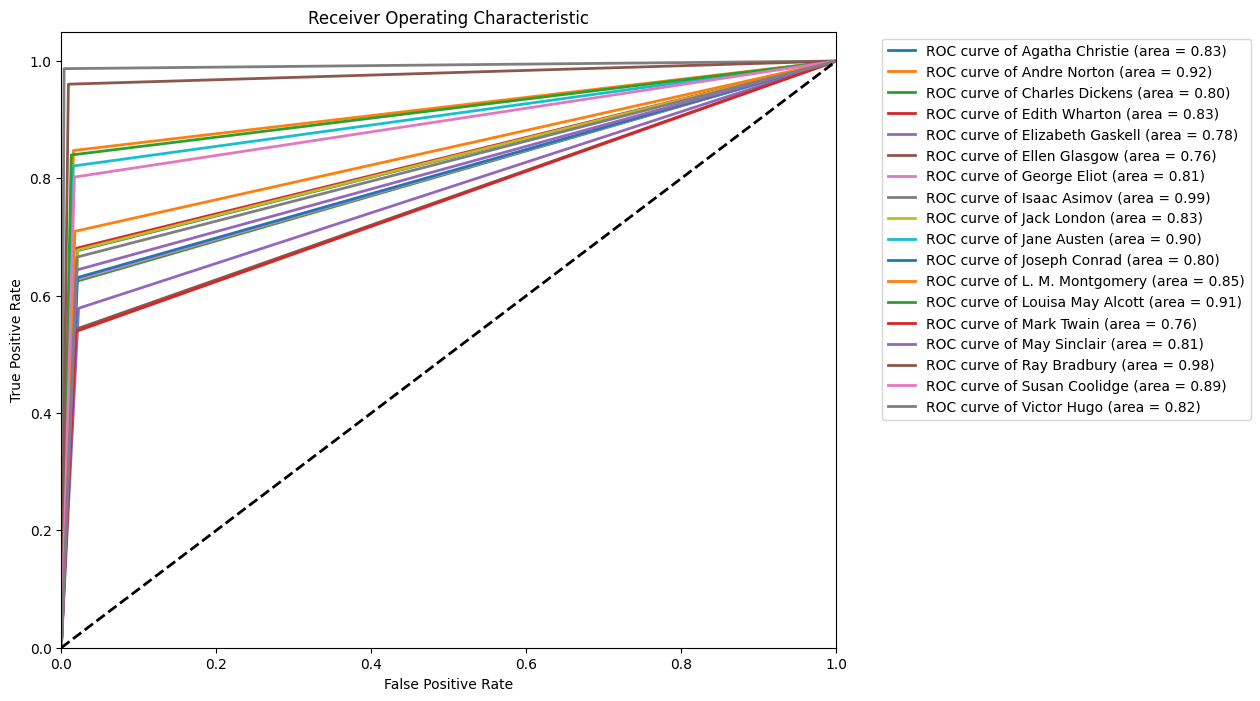

In [13]:
y_test_binarized = label_binarize(y_test, classes=[i for i in range(len(author_names))])
y_pred_binarized = label_binarize(y_pred, classes=[i for i in range(len(author_names))])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(author_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(author_names))))
for i, color in zip(range(len(author_names)), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'.format(author_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.savefig(f'{plots_dir}ReceiverOperatingCharacteristic.pdf', bbox_inches='tight')
plt.show()